Import necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

Load CIFAR-10 dataset (a common image classification dataset)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


Define a CNN model with Dropout for regularization

In [8]:
def create_model(use_dropout=True):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5) if use_dropout else layers.Identity(),  # Fixed here
        layers.Dense(10, activation='softmax')
    ])
    return model

Compile models (with and without dropout)

In [9]:
model_with_dropout = create_model(use_dropout=True)
model_without_dropout = create_model(use_dropout=False)

for model in [model_with_dropout, model_without_dropout]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

Train models and store history for visualization

In [10]:
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10,
                                              validation_data=(x_test, y_test), batch_size=64, verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.2467 - loss: 1.9863 - val_accuracy: 0.4712 - val_loss: 1.4230
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.4779 - loss: 1.4369 - val_accuracy: 0.5453 - val_loss: 1.2752
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5541 - loss: 1.2599 - val_accuracy: 0.6095 - val_loss: 1.0853
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5988 - loss: 1.1293 - val_accuracy: 0.6420 - val_loss: 1.0131
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6388 - loss: 1.0350 - val_accuracy: 0.6643 - val_loss: 0.9742
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6635 - loss: 0.9666 - val_accuracy: 0.6703 - val_loss: 0.9284
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6801 - loss: 0.9184 - val_accuracy: 0.6885 - val_loss: 0.8877
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7000 - loss: 0.8643 - val_accuracy: 0

In [11]:
history_without_dropout = model_without_dropout.fit(x_train, y_train, epochs=10,
                                                    validation_data=(x_test, y_test), batch_size=64, verbose=1)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.3303 - loss: 1.8027 - val_accuracy: 0.5138 - val_loss: 1.3314
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5532 - loss: 1.2438 - val_accuracy: 0.5992 - val_loss: 1.1188
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6262 - loss: 1.0612 - val_accuracy: 0.6507 - val_loss: 0.9948
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6742 - loss: 0.9335 - val_accuracy: 0.6501 - val_loss: 1.0013
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7086 - loss: 0.8378 - val_accuracy: 0.6766 - val_loss: 0.9338
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7377 - loss: 0.7604 - val_accuracy: 0.6897 - val_loss: 0.8981
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7572 - loss: 0.6949 - val_accuracy: 0.7111 - val_loss: 0.8594
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7722 - loss: 0.6576 - val_accuracy: 0.

Plot training and validation accuracy

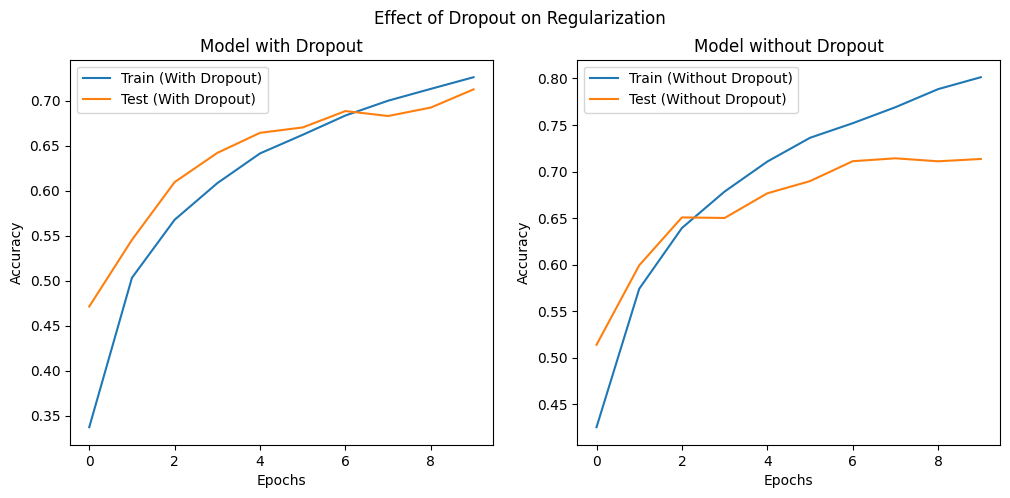

In [12]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_with_dropout.history['accuracy'], label='Train (With Dropout)')
plt.plot(history_with_dropout.history['val_accuracy'], label='Test (With Dropout)')
plt.title('Model with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_without_dropout.history['accuracy'], label='Train (Without Dropout)')
plt.plot(history_without_dropout.history['val_accuracy'], label='Test (Without Dropout)')
plt.title('Model without Dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle('Effect of Dropout on Regularization')
plt.show()


      - Dropout is applied in the fully connected layers to prevent co-adaptation of neurons.
      - The model without dropout may overfit, meaning high training accuracy but poor test accuracy.
      - The model with dropout generalizes better, meaning lower training accuracy but improved test accuracy.
      - This prevents neurons from relying too much on certain features, leading to a more robust model.